### 사전준비

In [1]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn으로 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 패션MNIST 데이터

#### 데이터 로드

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

#### 정규화

In [5]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
train_scaled = train_input / 225.0  # 0에서 1사이 실수값으로 변경

In [7]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [8]:
train_scaled.shape

(48000, 28, 28)

In [16]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


#### 모델생성 함수

In [16]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='model_fn_MakeModel')
    model.add(keras.layers.Flatten(input_shape=(28,28)))  # 2차원 입력값을 1차원으로 변경
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))

    if a_layer:  # a_layer가 none이 아니면
        model.add(a_layer)  # a_layer에 모델을 추가해라

    model.add(keras.layers.Dense(10, activation='softmax', name='output'))

    return model

In [17]:
# 함수 사용예
model = model_fn(keras.layers.Dense(100, activation='relu', name='hidden2'))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### 손실곡선, 정확도

In [23]:
# 함수 사용예
model = model_fn()
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 2s - loss: 0.5298 - accuracy: 0.8107 - 2s/epoch - 1ms/step
Epoch 2/5
1500/1500 - 2s - loss: 0.3896 - accuracy: 0.8606 - 2s/epoch - 1ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.3543 - accuracy: 0.8714 - 2s/epoch - 1ms/step
Epoch 4/5
1500/1500 - 2s - loss: 0.3375 - accuracy: 0.8791 - 2s/epoch - 1ms/step
Epoch 5/5
1500/1500 - 2s - loss: 0.3196 - accuracy: 0.8862 - 2s/epoch - 1ms/step


In [25]:
history.history

{'loss': [0.529822826385498,
  0.389627069234848,
  0.3543490469455719,
  0.33748841285705566,
  0.3195909559726715],
 'accuracy': [0.8106874823570251,
  0.8605833053588867,
  0.8713750243186951,
  0.8790624737739563,
  0.8862083554267883]}

#### 손실곡선 차트 (손실값이 어떻게 되어있는지 알수있음)

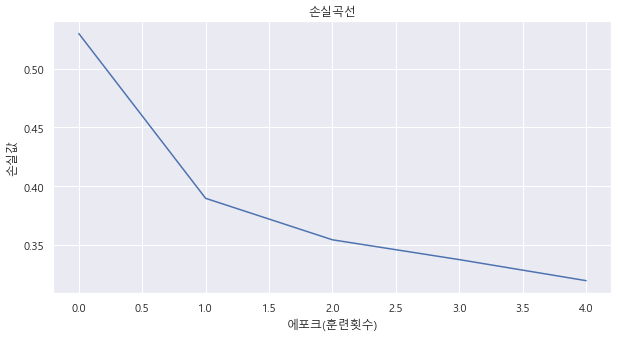

In [27]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('손실곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실값')
plt.show()

#### 정확도 차트

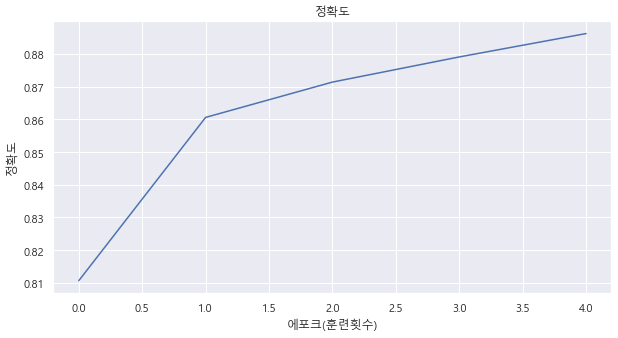

In [29]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.title('정확도')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('정확도')
plt.show()

#### 에포크 20번으로 늘려서 훈련 

In [30]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5327 - accuracy: 0.8132
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3894 - accuracy: 0.8604
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3543 - accuracy: 0.8735
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3322 - accuracy: 0.8805
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3194 - accuracy: 0.8871
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3086 - accuracy: 0.8925
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2991 - accuracy: 0.8955
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2913 - accuracy: 0.8989
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9017
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.278

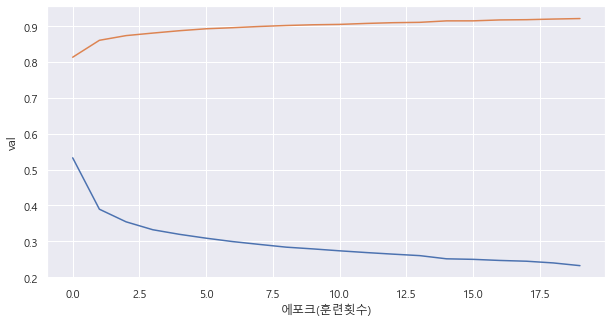

In [31]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
# plt.title('정확도')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('val')
plt.show()

#### 검증손실

훈련세트 훈련 => 정확도 92%

In [32]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5310 - accuracy: 0.8104 - val_loss: 0.4189 - val_accuracy: 0.8518
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3915 - accuracy: 0.8602 - val_loss: 0.4106 - val_accuracy: 0.8565
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3568 - accuracy: 0.8724 - val_loss: 0.3847 - val_accuracy: 0.8637
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3364 - accuracy: 0.8794 - val_loss: 0.3683 - val_accuracy: 0.8705
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3217 - accuracy: 0.8864 - val_loss: 0.3843 - val_accuracy: 0.8718
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3133 - accuracy: 0.8885 - val_loss: 0.3673 - val_accuracy: 0.8792
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3005 - accuracy: 0.8934 - val_loss: 0.3951 - val_accuracy:

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련세트 / 검증세트 비교

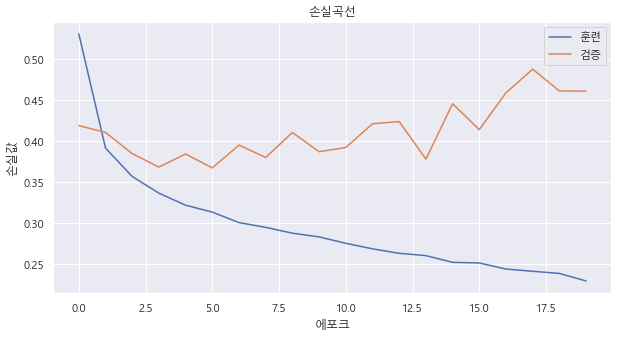

In [34]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련', '검증'])
plt.show()

#### 드롭아웃

In [35]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5890 - accuracy: 0.7939 - val_loss: 0.4357 - val_accuracy: 0.8447
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4482 - accuracy: 0.8417 - val_loss: 0.3986 - val_accuracy: 0.8590
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4257 - accuracy: 0.8512 - val_loss: 0.4048 - val_accuracy: 0.8612
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4101 - accuracy: 0.8576 - val_loss: 0.3970 - val_accuracy: 0.8626
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4025 - accuracy: 0.8620 - val_loss: 0.3783 - val_accuracy: 0.8747
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3988 - accuracy: 0.8661 - val_loss: 0.3847 - val_accuracy: 0.8714
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3910 - accuracy: 0.8667 - val_loss: 0.3882 - val_accuracy:

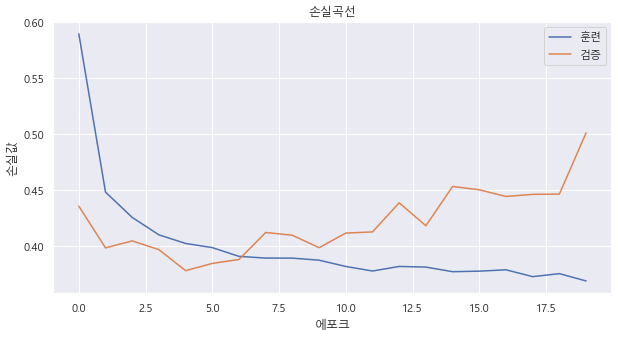

In [37]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련', '검증'])
plt.show()

In [38]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3707 - accuracy: 0.8753 - val_loss: 0.3987 - val_accuracy: 0.8702
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3442 - accuracy: 0.8768 - val_loss: 0.3920 - val_accuracy: 0.8759
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3424 - accuracy: 0.8780 - val_loss: 0.3905 - val_accuracy: 0.8762
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3322 - accuracy: 0.8810 - val_loss: 0.4031 - val_accuracy: 0.8764
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3172 - accuracy: 0.8812 - val_loss: 0.3976 - val_accuracy: 0.8773
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3138 - accuracy: 0.8854 - val_loss: 0.3877 - val_accuracy: 0.8749
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3143 - accuracy: 0.8842 - val_loss: 0.3682 - val_accuracy:

#### 모델 저장 / 로드

In [39]:
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [40]:
# 훈련된 가중치만 저장
model.save_weights('./data/model-weights.h5')

In [41]:
# 훈련된 전체 데이터 저장
model.save('./data/model.h5')

##### 가중치 모델 로드

In [42]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model-weights.h5')

In [43]:
# 가중치만 불러왔기때문에 오류가 남
model.evaluate(val_scaled, val_target)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

##### 전체모델 로드

In [44]:
model = keras.models.load_model('./data/model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3894 - accuracy: 0.8813


[0.3893616795539856, 0.8813333511352539]

가중치만 저장하면 모델 기능 제약있음, 훈련된 모델의 전체 데이터를 저장하면 모든 기능 수행 가능

In [45]:
model.predict(val_scaled)

375/375 [==============================] - 0s 929us/step


array([[1.05671480e-29, 0.00000000e+00, 4.25568352e-34, ...,
        1.22803656e-17, 1.00000000e+00, 3.33028991e-24],
       [1.88058785e-22, 0.00000000e+00, 1.78088106e-34, ...,
        3.93766508e-27, 1.00000000e+00, 1.03698184e-18],
       [4.65405489e-34, 5.47589177e-35, 0.00000000e+00, ...,
        9.99998331e-01, 3.61121852e-21, 1.44998955e-17],
       ...,
       [1.74944464e-17, 0.00000000e+00, 1.87683599e-26, ...,
        1.04071141e-17, 1.00000000e+00, 9.92536436e-15],
       [9.77751638e-17, 0.00000000e+00, 1.35013173e-21, ...,
        2.53141986e-21, 1.00000000e+00, 2.25639758e-24],
       [1.42237470e-02, 3.80705378e-09, 1.06672529e-08, ...,
        5.99312247e-04, 3.42910766e-06, 9.83636320e-01]], dtype=float32)

In [46]:
# 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 1ms/step


0.8813333333333333

In [48]:
val_labels

array([8, 8, 7, ..., 8, 8, 9], dtype=int64)

#### 콜백 Callback

In [49]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

# 베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5894 - accuracy: 0.7928 - val_loss: 0.4341 - val_accuracy: 0.8467
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4412 - accuracy: 0.8421 - val_loss: 0.3876 - val_accuracy: 0.8589
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4078 - accuracy: 0.8536 - val_loss: 0.3701 - val_accuracy: 0.8650
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3827 - accuracy: 0.8606 - val_loss: 0.3777 - val_accuracy: 0.8569
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3656 - accuracy: 0.8666 - val_loss: 0.3438 - val_accuracy: 0.8751
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3529 - accuracy: 0.8710 - val_loss: 0.3407 - val_accuracy: 0.8758
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3463 - accuracy: 0.8731 - val_loss: 0.3482 - val_accuracy:

In [50]:
# 체크포인트 확인
model = keras.models.load_model('./data/best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3360 - accuracy: 0.8818


[0.3360423445701599, 0.8818333148956299]

#### 조기종료

In [67]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

# 베스트 모델을 저장할 콜백
# save_best_only=True이 지정되어야지 가장 좋은 모델이 저장됨
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_mode2.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)  # patience 손실값이 올라갈때 몇번참아줄건지 설정한 횟수가 지나면 조기종료시키기
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1493/1500 [============================>.] - ETA: 0s - loss: 0.5891 - accuracy: 0.7906
Epoch 1: val_loss improved from inf to 0.43649, saving model to ./data\best_mode2.h5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5885 - accuracy: 0.7907 - val_loss: 0.4365 - val_accuracy: 0.8412
Epoch 2/20
1490/1500 [============================>.] - ETA: 0s - loss: 0.4421 - accuracy: 0.8396
Epoch 2: val_loss improved from 0.43649 to 0.38357, saving model to ./data\best_mode2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4427 - accuracy: 0.8393 - val_loss: 0.3836 - val_accuracy: 0.8582
Epoch 3/20
1483/1500 [============================>.] - ETA: 0s - loss: 0.4078 - accuracy: 0.8526
Epoch 3: val_loss improved from 0.38357 to 0.37074, saving model to ./data\best_mode2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4074 - accuracy: 0.8526 - val_loss: 0.3707 - val_accuracy: 0.8647
Epoch 4/20
1500/1500 [======================

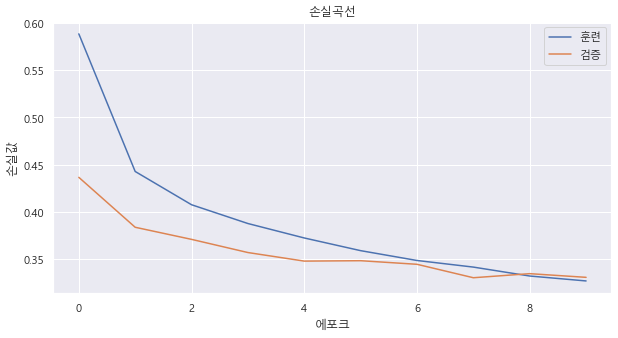

In [68]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련', '검증'])
plt.show()

In [69]:
# 어느 에포크에서 조기종료했는지 확인
early_stopping_cb.stopped_epoch  # 9번째에서 멈춤(드랍아웃) - 8번째 모델이 저장됨

9

In [70]:
model.evaluate(val_scaled, val_target)  # 8번째 에포크값

375/375 [==============================] - 1s 2ms/step - loss: 0.3301 - accuracy: 0.8796


[0.3300785422325134, 0.8795833587646484]

### 조기종료된 모델 저장값 / 체크포인트로 저장된 모델 저장값 비교

In [71]:
model_cp = keras.models.load_model('./data/best_mode2.h5')
model_cp.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3301 - accuracy: 0.8796


[0.3300785422325134, 0.8795833587646484]